Import libraries and data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

df = pd.read_csv("profiles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

Investigate the data

In [8]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [7]:
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [10]:
print("The youngest: ", np.min(df.age))
print("The oldest: ", np.max(df.age))

The youngest:  18
The oldest:  110


this is definetely a mistake, there is no way someone can be 110 years old, lets investigate this row

In [12]:
print(df[df.age == 110])

      age body_type diet drinks drugs education essay0 essay1 essay2 essay3  \
2512  110       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   

      ...               location offspring orientation pets religion sex sign  \
2512  ...  daly city, california       NaN    straight  NaN      NaN   f  NaN   

      smokes   speaks  status  
2512     NaN  english  single  

[1 rows x 31 columns]


Yeah, it does look fake, lets looks at the distributions.
we are gonna have to drop this row

In [13]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Text(0.5, -0.1, 'Data is right skewed')

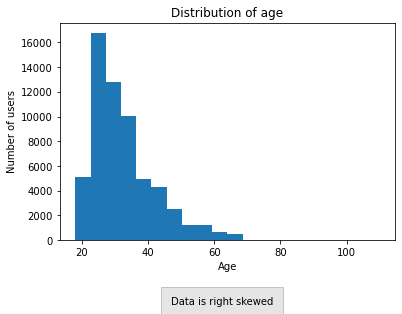

In [61]:
plt.hist(df.age, bins=20)
plt.title("Distribution of age")
plt.ylabel("Number of users")
plt.xlabel("Age")
plt.figtext(0.5, -0.1, "Data is right skewed", ha="center", fontsize=10, bbox={"facecolor":"grey", "alpha":0.2, "pad":10})

In [55]:
print((df[df["age"] >= 70]))

       age body_type          diet drinks  drugs                   education  \
2512   110       NaN           NaN    NaN    NaN                         NaN   
25324  109  athletic  mostly other    NaN  never  working on masters program   

      essay0 essay1 essay2   essay3  ...                   location  \
2512     NaN    NaN    NaN      NaN  ...      daly city, california   
25324    NaN    NaN    NaN  nothing  ...  san francisco, california   

             offspring orientation pets                             religion  \
2512               NaN    straight  NaN                                  NaN   
25324  might want kids    straight  NaN  other and somewhat serious about it   

      sex                                  sign         smokes  \
2512    f                                   NaN            NaN   
25324   m  aquarius but it doesn&rsquo;t matter  when drinking   

               speaks     status  
2512          english     single  
25324  english (okay)  available  


In [54]:
over60 = df.apply(lambda x: True if x["age"] >= 60 else False, axis=1)
num_rows = len(over60[over60 == True].index)
print('Number ofPeople older than 60 : ',
      num_rows)

Number ofPeople older than 60 :  1161


In [68]:
category = pd.cut(df['age'], bins=[18, 20, 30, 40, 50, 60, 70],
right=False, labels=["+18", "20_30", "30_40", "40_50", "50_60", "over70"])
df.insert(2, "Age_group", category)
df.head(3)

ValueError: cannot insert Age_group, already exists

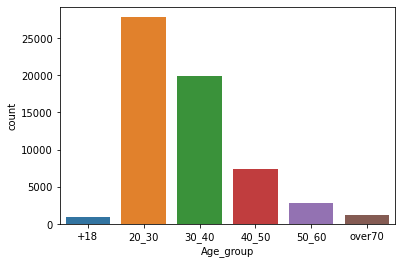

In [74]:
sns.countplot(df["Age_group"])